# Solución Radial

El sistema consta de un electrón girándo en torno a un núcleo (protón) con radio no fijo.

El Hamiltoniano de este sistema contiene la energía cinética del electrón, la energía cinética del núcleo y la interacción coulómbica núcleo-electrón.
\begin{equation}
H=-\frac{\hbar^2}{2m_e}\nabla^2_e-\frac{\hbar^2}{2m_N}\nabla^2_N-\frac{e^2}{|\vec{r}_p-\vec{r}_e|}
\end{equation}

La ecuación de Schrodinger a resolver es
\begin{equation}
\left(-\frac{\hbar^2}{2m_e}\nabla^2_e-\frac{\hbar^2}{2m_N}\nabla^2_N-\frac{e^2}{|\vec{r}_p-\vec{r}_e|}\right) \Psi = E \Psi
\end{equation}

El problema se puede simplificar al utilizar coordenadas de masa reducida, la nueva ecuación de Schrodinger es
\begin{equation}
\left(-\frac{\hbar^2}{2M_T}\nabla^2_{R_{cm}}-\frac{\hbar^2}{2\mu}\nabla^2_r-\frac{e^2}{|\vec{r}|}\right) \Psi = E \Psi
\end{equation}

La función de onda $\Psi$ de la ecuación anterior depende de las coordenadas del centro de masa, $R$ y de las coordenadas de la masa reducida, $r$. Se propone una solución por separación de variables, tal que $\Psi(R,r) = \Phi(R) \psi(r)$. Al sustituir en la ecuación de Schrodinger se obtienen 2 ecuaciones
\begin{equation}
\left(-\frac{\hbar^2}{2M}\nabla^2_{R_{cm}}\right) \Phi = E_R \Phi
\end{equation}
\begin{equation}
\left(-\frac{\hbar^2}{2\mu}\nabla^2_r-\frac{e^2}{|\vec{r}|}\right) \psi = E \psi
\end{equation}

La primera ecuación corresponde al movimiento de una partícula libre. Para resolver la segunda ecuación cambiamos a coordenadas polares, recordando que 
\begin{equation}
\nabla^2_r=\left(\frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} + \frac{\partial^2}{\partial z^2} \right) = \left( \frac{1}{r} \frac{\partial}{\partial r^2} r + \frac{1}{r^2} \Lambda^2 \right) 
\end{equation}

Entonces
\begin{equation}
\left(-\frac{\hbar^2}{2\mu} \frac{1}{r} \frac{\partial}{\partial r^2} r -\frac{\hbar^2}{2\mu} \frac{1}{r^2} \Lambda^2 -\frac{e^2}{|\vec{r}|}\right) \psi = E \psi
\end{equation}

Se propone que la función de onda $\psi$ puede ser separada en una parte radial y una parte angular, es decir $\psi=R(r)Y(\theta,\phi)$. Esto genera una ecuación a resolver para la parte radial (y una para la parte angular que trataremos posteriormente)
\begin{equation}
-\frac{\hbar^2}{2\mu} \frac{1}{r} \frac{d(rR)}{dr} -\frac{\hbar^2}{2\mu} \left[ \frac{e^2}{r} -\frac{l(l+1)}{r^2} \right] R = ER 
\end{equation}

Las soluciones a esta ecuación son
\begin{equation}
R_{n,l}(r) = N_{n,l} \left( \frac{2r}{na_0} \right)^l e^{-r/na_0} L_{n+l}^{2l+1} \left( \frac{2r}{n a_0} \right)
\end{equation}

donde $n=1,2,3,...$ y $l=0,...,n-1$ son números cuánticos, y $N_{n,l}$ toma la forma
\begin{equation}
N_{n,l} = \left( \frac{2}{na_0} \right)^{3/2} \sqrt{\frac{(n-l-1)!}{2n[(n+l)!]^3}}
\end{equation}

$L_{n+l}^{2l+1}$ son los polinomios asociados de Laguerre
\begin{equation}
L_{k}^N (r) = \frac{d^N}{dr^N} L_k(r)
\end{equation}
\begin{equation}
L_{k} (r) = e^r \frac{d^k}{dr^k} \left(r^k e^{-r}\right)
\end{equation}

**Realice la gráfica de R(r) (la parte radial de la función de onda) para los orbitales 1s (n=1, l=0),2s (n=2, l=0),3s (n=3, l=0) y 4s (n=4, l=0), y de $4\pi r^2R^2$.**

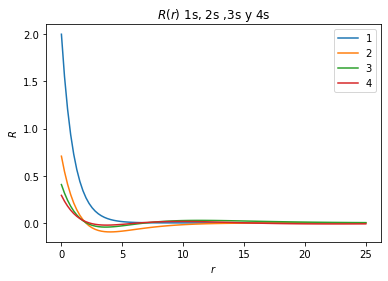

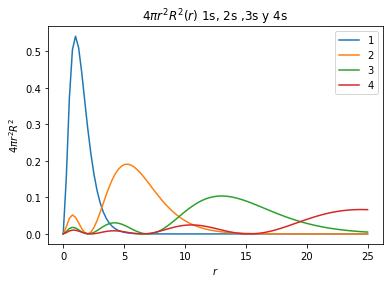

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import derivative as derivative
from scipy.special import laguerre as laguerre

#Cambiar aqui para ajustar limites del eje X
r=np.linspace(0,25,100)

a0=1.0

#Cambiar aqui para usar s,p,d,etc
l=0
#Cambiar aquí para elegir limites de los numeros cuanticos n
n_min=1
n_max=4

for n in range(n_min,n_max+1):
    N=-np.power(2/(n*a0),3.0/2.0)*np.sqrt((np.math.factorial(n-l-1))/(2*n*np.power((np.math.factorial(n+l)),3.0)))
    L=laguerre(n+l)
    L=L/np.abs(L[n+l])
    assoc_L=derivative(L,2*r/(n*a0),n=2*l+1,order=2*l+3)

    R=N*(2*r/(n*a0))**l*np.exp(-r/(n*a0))*assoc_L

    plt.plot(r,R,label=n)

plt.legend()
#Cambiar aqui los titulos de los ejes
plt.xlabel("$r$")
plt.ylabel("$R$")
plt.title("$R(r)$ 1s, 2s ,3s y 4s")
plt.show()

for n in range(n_min,n_max+1):
    N=-np.power(2/(n*a0),3.0/2.0)*np.sqrt((np.math.factorial(n-l-1))/(2*n*np.power((np.math.factorial(n+l)),3.0)))
    L=laguerre(n+l)
    L=L/np.abs(L[n+l])
    assoc_L=derivative(L,2*r/(n*a0),n=2*l+1,order=2*l+3)

    R=N*(2*r/(n*a0))**l*np.exp(-r/(n*a0))*assoc_L

    plt.plot(r,r**2.0*R**2.0,label=n)

plt.legend()
#Cambiar aqui los titulos de los ejes
plt.xlabel("$r$")
plt.ylabel("$4\pi r^2R^2$")
plt.title("$4\pi r^2R^2(r)$ 1s, 2s ,3s y 4s")
plt.show()

**Realice la gráfica de la parte radial de la función de onda para los orbitales 3s (n=3, l=0),3p (n=3, l=1) y 3d (n=3, l=2), y de $4\pi r^2R^2$.**

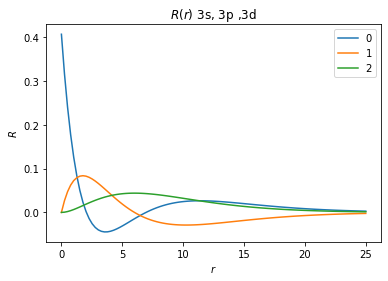

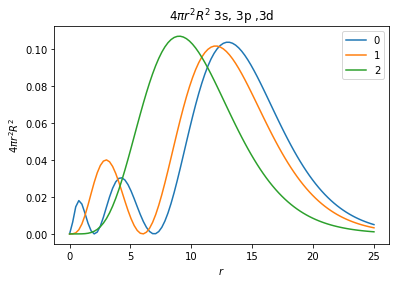

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.misc import derivative as derivative
from scipy.special import laguerre as laguerre

#Cambiar aqui para ajustar eje X
r=np.linspace(0,25,100)

a0=1.0

#Cambiar aqui para elegir n
n=3
#Cambiar aquí para elegir numeros cuanticos l
lmin=0
lmax=2

for l in range(lmin,lmax+1):
    N=-np.power(2/(n*a0),3.0/2.0)*np.sqrt((np.math.factorial(n-l-1))/(2*n*np.power((np.math.factorial(n+l)),3.0)))
    L=laguerre(n+l)
    L=L/np.abs(L[n+l])
    assoc_L=derivative(L,2*r/(n*a0),n=2*l+1,order=2*l+3)

    R=N*(2*r/(n*a0))**l*np.exp(-r/(n*a0))*assoc_L

    plt.plot(r,R,label=l)

plt.legend()
#Cambiar aqui los titulos de los ejes
plt.xlabel("$r$")
plt.ylabel("$R$")
plt.title("$R(r)$ 3s, 3p ,3d")
plt.show()

for l in range(lmin,lmax+1):
    N=-np.power(2/(n*a0),3.0/2.0)*np.sqrt((np.math.factorial(n-l-1))/(2*n*np.power((np.math.factorial(n+l)),3.0)))
    L=laguerre(n+l)
    L=L/np.abs(L[n+l])
    assoc_L=derivative(L,2*r/(n*a0),n=2*l+1,order=2*l+3)

    R=N*(2*r/(n*a0))**l*np.exp(-r/(n*a0))*assoc_L

    plt.plot(r,r**2.0*R**2.0,label=l)

plt.legend()
#Cambiar aqui los titulos de los ejes
plt.xlabel("$r$")
plt.ylabel("$4\pi r^2R^2$")
plt.title("$4\pi r^2R^2$ 3s, 3p ,3d")
plt.show()

## Referencias

- Atkins, P. W.; Friedman, R. Molecular Quantum Mechanics, 4th ed.; Oxford University Press: New York, 2005.
- Pilar, F. L. Elementary Quantum Chemistry; 2001.
- Zettili, N. Quantum Mechanics: Concepts and Applications, 2nd ed.; Wiley: Chichester, U.K, 2009.
- Levine, I. N. Quantum Chemistry, 5th ed.; Prentice Hall: Upper Saddle River, N.J, 2000.
- McQuarrie, D. A.; Simon, J. D. Physical Chemistry: A Molecular Approach; University Science Books: Sausalito, Calif, 1997.